In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
from matplotlib import pyplot as plt
import glob
import IPython.display as ipd
%pylab inline

import warnings
warnings.filterwarnings('ignore')



ImportError: Unable to import required dependencies:
numpy: No module named 'secrets'

In [4]:
df = pd.read_csv('train/train.csv')
df.tail()

,ID,Class
5430,8725,engine_idling
5431,8726,dog_bark
5432,8727,engine_idling
5433,8728,engine_idling
5434,8729,air_conditioner


In [5]:
df.size

10870

In [6]:
Class_values = df.Class.unique()
print(len(Class_values))
print(Class_values)

10
['siren' 'street_music' 'drilling' 'dog_bark' 'children_playing'
 'gun_shot' 'engine_idling' 'air_conditioner' 'jackhammer' 'car_horn']


In [7]:
ipd.Audio('train/Train/2002.wav')

In [8]:
data, sampling_rate = librosa.load('train/Train/121.wav')

In [9]:
data

array([-0.00441121,  0.00826147,  0.01385483, ..., -0.00168899,
        0.00895292,  0.0065225 ], dtype=float32)

In [10]:
sampling_rate

22050

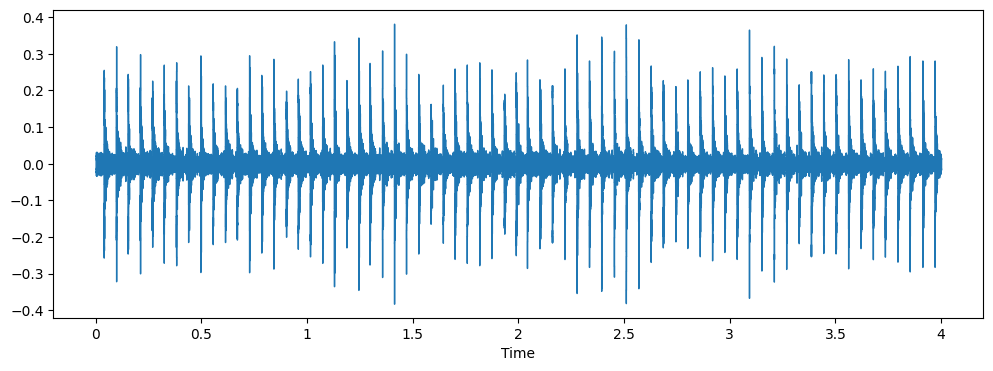

In [11]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr = sampling_rate)

Class: engine_idling
22050


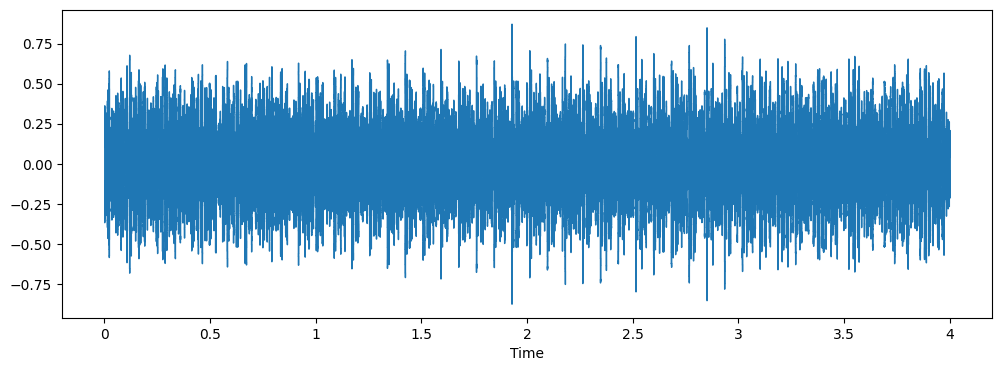

In [12]:
import random
index = random.randint(0,5434)

print('Class:', df['Class'][index])
data, sampling_rate = librosa.load('train/Train/'+str(df['ID'][index]) + '.wav')
print(sampling_rate)
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)

Class: dog_bark
22050


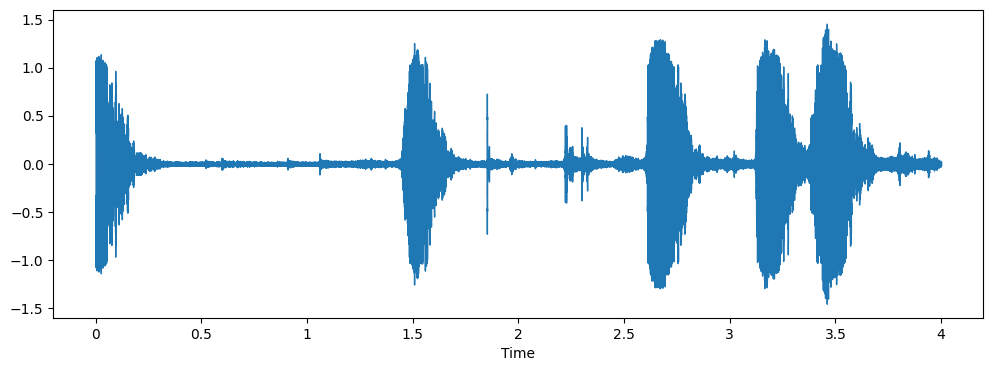

In [13]:
index = random.randint(0,5434)

print('Class:', df['Class'][index])
data, sampling_rate = librosa.load('train/Train/'+str(df['ID'][index]) + '.wav')
print(sampling_rate)
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)

Class: children_playing
22050


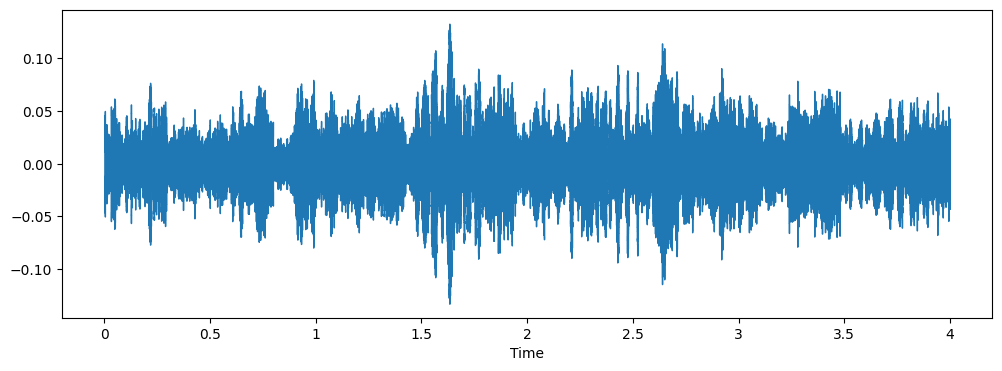

In [14]:
index = random.randint(0,5434)

print('Class:', df['Class'][index])
data, sampling_rate = librosa.load('train/Train/'+str(df['ID'][index]) + '.wav')
print(sampling_rate)
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)

Class: dog_bark
22050


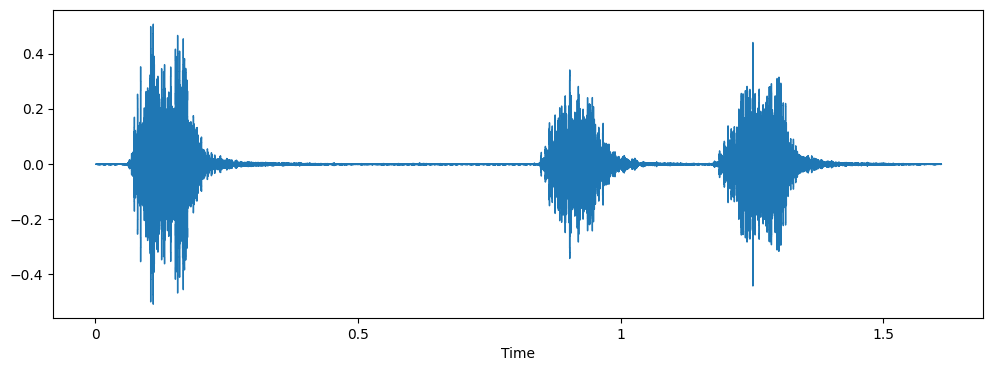

In [15]:
index = random.randint(0,5434)
print('Class:', df['Class'][index])
data, sampling_rate = librosa.load('train/Train/'+str(df['ID'][index]) + '.wav')
print(sampling_rate)
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)

In [16]:
import os

def features_extractor(file):
    audio, sample_rate = librosa.load(file) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [17]:
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join('train/Train', str(row.ID) + '.wav')
    final_class_labels=row["Class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]

5435it [01:28, 61.25it/s]


In [18]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-74.75043, 128.71107, -31.76348, 14.368914, -...",siren
1,"[-8.022532, 112.755035, -18.155668, 28.423483,...",street_music
2,"[-114.8943, 2.8652444, -37.835094, -4.812474, ...",drilling
3,"[-212.26454, 87.15653, -53.341854, 10.725098, ...",siren
4,"[-235.51057, 132.81607, 42.24309, 18.182558, 1...",dog_bark


In [19]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [20]:
X

array([[-7.47504272e+01,  1.28711075e+02, -3.17634792e+01, ...,
         9.13345575e-01, -4.00004148e+00,  4.37643886e-01],
       [-8.02253246e+00,  1.12755035e+02, -1.81556683e+01, ...,
         1.83605325e+00,  6.97077870e-01,  7.63069451e-01],
       [-1.14894302e+02,  2.86524439e+00, -3.78350945e+01, ...,
         1.48276353e+00, -4.03121758e+00,  3.26834297e+00],
       ...,
       [-3.11937195e+02,  4.52968597e+01,  5.98302174e+00, ...,
         7.95190334e-01, -4.81492138e+00,  2.25429010e+00],
       [-2.70640533e+02,  1.31976074e+02, -2.72101803e+01, ...,
         1.12834227e+00, -4.77941602e-01,  3.31865740e+00],
       [-2.91071075e+02,  2.33189178e+02, -4.66932869e+00, ...,
         3.01517159e-01, -3.36263865e-01, -4.30785641e-02]], dtype=float32)

In [21]:
y

array(['siren', 'street_music', 'drilling', ..., 'engine_idling',
       'engine_idling', 'air_conditioner'], dtype='<U16')

In [22]:
y.shape

(5435,)

In [23]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [24]:
y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
X_train

array([[-1.7762044e+02,  1.3205997e+02, -1.1619841e+01, ...,
         2.0015998e-01, -2.5546796e+00,  3.0721040e+00],
       [-2.7929587e+02,  2.1619418e+02, -1.0739839e+02, ...,
        -1.1824448e+00,  1.9708693e+00,  4.0568175e+00],
       [-1.7739061e+02,  1.6002318e+02,  2.6586315e+01, ...,
         4.6725850e+00,  3.8562138e+00,  9.7862738e-01],
       ...,
       [-3.1580716e+02,  9.8730637e+01, -6.7281502e+01, ...,
        -1.6184412e+00, -3.3160975e+00, -2.9498351e+00],
       [-2.0197031e+02,  1.2619907e+02, -8.7261948e+01, ...,
         5.5620756e+00, -3.0251591e+00, -3.7498501e-01],
       [-3.4241550e+02,  1.7014542e+02, -4.8881474e+01, ...,
         1.4140477e+00,  1.5147079e+00,  2.2619548e+00]], dtype=float32)

In [27]:
X_train.shape

(4348, 40)

In [28]:
X_test.shape

(1087, 40)

In [29]:
y_train.shape

(4348, 10)

In [30]:
y_test.shape

(1087, 10)

In [31]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [32]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.optimizers import Adam
from sklearn import metrics

In [33]:
num_labels=y.shape[1]
num_labels

10

In [34]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [36]:
model_history = model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_test, y_test),  verbose=1)

Epoch 1/1000
136/136 [==============================] - 2s 5ms/step - loss: 16.1319 - accuracy: 0.1090 - val_loss: 2.2752 - val_accuracy: 0.1371
Epoch 2/1000
136/136 [==============================] - 0s 3ms/step - loss: 3.1855 - accuracy: 0.1265 - val_loss: 2.2916 - val_accuracy: 0.1132
Epoch 3/1000
136/136 [==============================] - 0s 3ms/step - loss: 2.5172 - accuracy: 0.1228 - val_loss: 2.2832 - val_accuracy: 0.1150
Epoch 4/1000
136/136 [==============================] - 0s 3ms/step - loss: 2.3690 - accuracy: 0.1313 - val_loss: 2.2757 - val_accuracy: 0.1168
Epoch 5/1000
136/136 [==============================] - 0s 3ms/step - loss: 2.3401 - accuracy: 0.1359 - val_loss: 2.2663 - val_accuracy: 0.1205
Epoch 6/1000
136/136 [==============================] - 1s 4ms/step - loss: 2.2995 - accuracy: 0.1332 - val_loss: 2.2572 - val_accuracy: 0.1260
Epoch 7/1000
136/136 [==============================] - 0s 3ms/step - loss: 2.2916 - accuracy: 0.1332 - val_loss: 2.2526 - val_accuracy

In [37]:
acc = model.evaluate(X_test,y_test)
print('Accuracy = ', acc[1]*100)
print(acc)

34/34 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.8418
Accuracy =  84.1766357421875
[0.5202728509902954, 0.841766357421875]


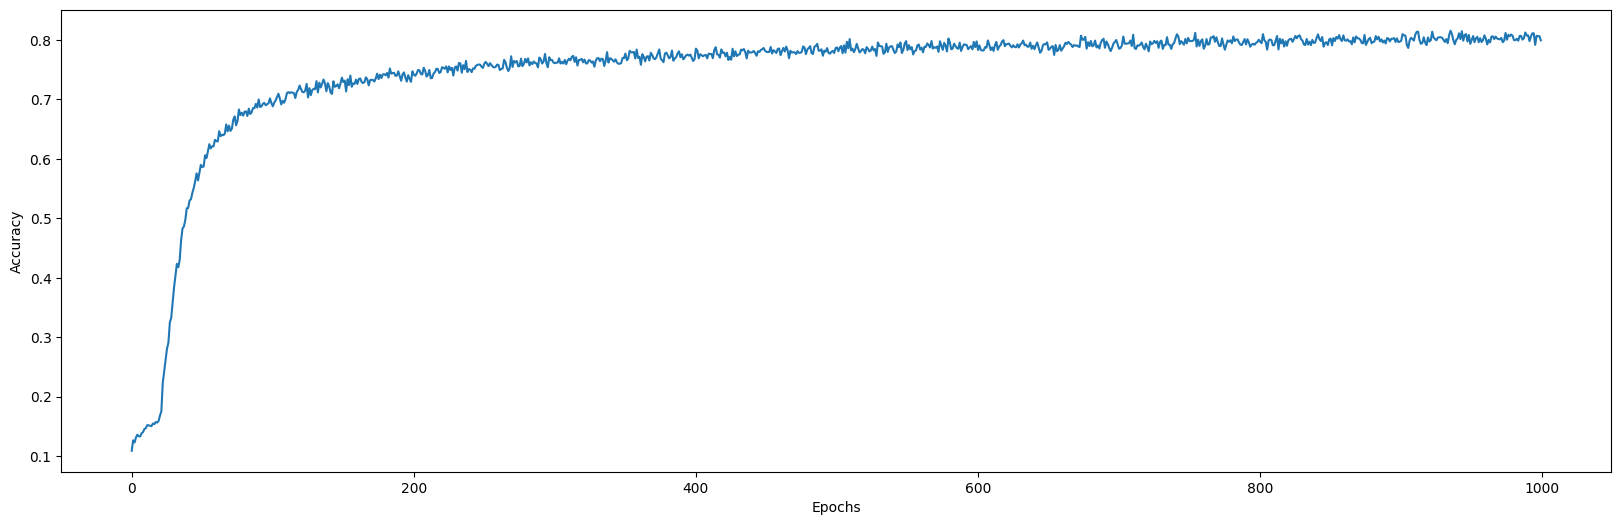

In [38]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,6))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(model_history.history['accuracy'])


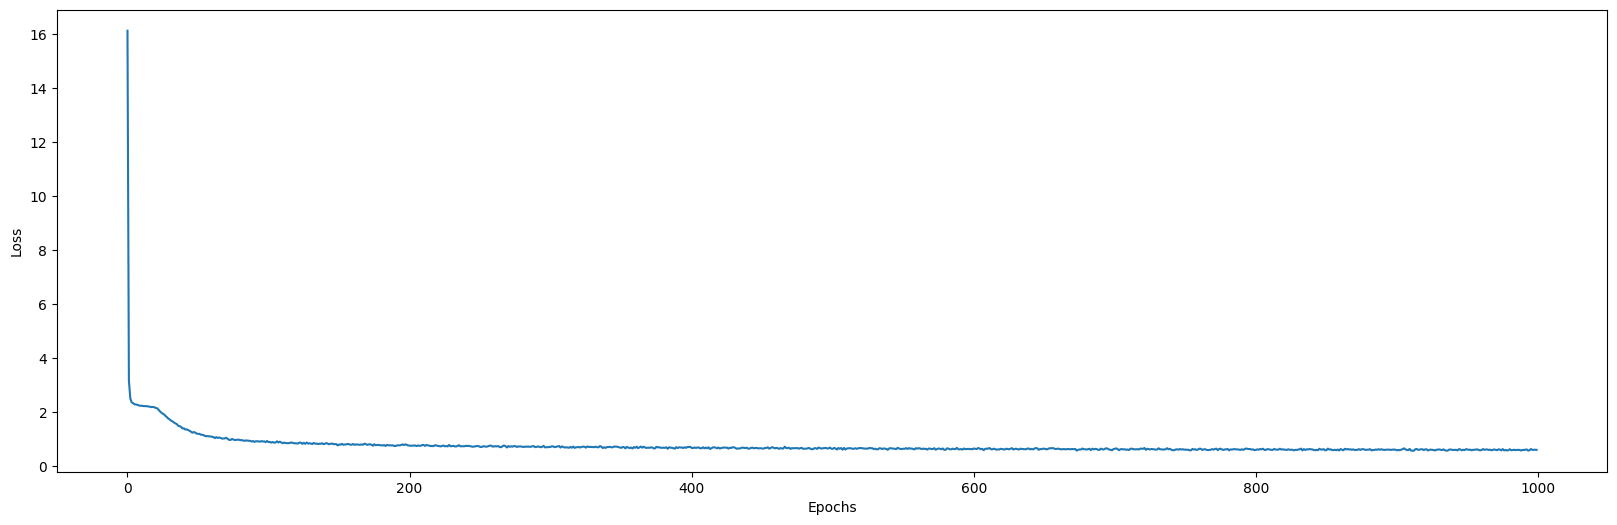

In [39]:
plt.figure(figsize=(20,6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(model_history.history['loss'])

In [40]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)

In [41]:
test_accuracy[1]*100

84.1766357421875

In [42]:
preds=np.argmax(model.predict(X_test), axis=-1)

34/34 [==============================] - 0s 1ms/step


In [43]:
labelencoder.inverse_transform(preds)

array(['siren', 'siren', 'children_playing', ..., 'children_playing',
       'drilling', 'siren'], dtype='<U16')

In [44]:
filename='test/Test/30.wav'
def prediction(audio_input):
    audio, sample_rate = librosa.load(audio_input)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    predicted_label=np.argmax(model.predict(mfccs_scaled_features), axis=-1)
    prediction_class = labelencoder.inverse_transform(predicted_label) 
    return prediction_class[0]


In [45]:
print(prediction(filename))

1/1 [==============================] - 0s 20ms/step
dog_bark


In [46]:
import gradio as gr

def prediction(audio_input):
    audio, sample_rate = librosa.load(audio_input)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    predicted_label=np.argmax(model.predict(mfccs_scaled_features), axis=-1)
    prediction_class = labelencoder.inverse_transform(predicted_label) 
    return prediction_class[0]



demo = gr.Interface(
    fn=prediction,
    inputs= gr.Audio(label="Audio file", type="filepath"),
    outputs= "text",
)

demo.launch(share=True)



Running on local URL:  http://127.0.0.1:7860

Thanks for being a Gradio user! If you have questions or feedback, please join our Discord server and chat with us: https://discord.gg/feTf9x3ZSB

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


1/1 [==============================] - 0s 39ms/step


ERROR:    Exception in ASGI application
  + Exception Group Traceback (most recent call last):
  |   File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\starlette\middleware\base.py", line 192, in __call__
  |     await response(scope, wrapped_receive, send)
  |   File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\starlette\responses.py", line 257, in __call__
  |     async with anyio.create_task_group() as task_group:
  |   File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\anyio\_backends\_asyncio.py", line 678, in __aexit__
  |     raise BaseExceptionGroup(
  | ExceptionGroup: unhandled errors in a TaskGroup (1 sub-exception)
  +-+---------------- 1 ----------------
    | Traceback (most recent call last):
    |   File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\uvicorn\protocols\http\h11_impl.py", line 408, in run_asgi
    |     result = await app(  # type: ignore[fu

1/1 [==============================] - 0s 30ms/step
